In [4]:
pip install ../../

Defaulting to user installation because normal site-packages is not writeable
Processing /home/mehdi/Straph
  Preparing metadata (setup.py) ... done
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=128883 sha256=17fecc60ec96d227c776575213417d61ea7ddce581fe4d927c3e71c26b60da6e
  Stored in directory: /tmp/pip-ephem-wheel-cache-16jk2bbg/wheels/ff/7b/fd/74f1a0c1e7fef46f5399a409f7bb3afe2da4ba468d26b5f5b7
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt
import straph.betweenness as bt
import numpy
import time
import os

In [14]:
def check_betweenness(bet_moi, bet_mat):
    nb_error = 0
    nb_values = 0
    for v in bet_moi.keys():
        for t in bet_moi[v].keys():
            nb_values += 1
            if (v.lower() in bet_mat ):
                if not (abs(bet_moi[v][t] - bet_mat[v.lower()][t]) < 1/100):
                    nb_error +=1
                    print("erreur ",v,t,"=>   ", bet_moi[v][t], bet_mat[v.lower()][t])
    return nb_error, nb_values

In [22]:
nb_error = 0
repet = 2
res_moi = []
res_matthieu = []
res_matthieu_mem = []
res_events = []
for nb_node in range(4,21,2):
    print(nb_node)
    if nb_error > 0:
        break
    print(nb_node)
    temps_moi = 0
    temps_matthieu = 0
    temps_matthieu_mem = 0
    nb_values = 0
    for rep in range(repet):
        T = [0, 100]
        occurrence_law_node = 'poisson'
        presence_law_node = 'uniform'
        occurrence_param_node = 3
        presence_param_node = 25
        occurrence_law_link = 'poisson'
        presence_law_link = 'uniform'
        occurrence_param_link = 5
        presence_param_link = 15
        p_link = numpy.sqrt(nb_node)/nb_node
        S = sg.erdos_renyi(T,nb_node,occurrence_law_node,occurrence_param_node,presence_law_node,
                   presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    p_link)
        un_S = bt.to_undirected(S)
        print("fin_undirec")
        SS = un_S.stream_graph_to_link_stream()
        print("fin_to link stream")
        SS.write_to_matthieu_link_stream("any")
        print("fin_write to matthieu")
        start = time.time()
        bt.simulations(SS, "papier")
        end = time.time()
        temps_moi += (end - start)
        print("fin moi")
        
        
        bet_moi = bt.read_dictionary("papier_betweenness.pic")
        cmd = 'mv any_mat.ls archive_code/Test'
        os.system(cmd)
        
        cmd = 'python2 archive_code/betweenness_memoise.py Test/any_mat.ls -1 res'
        start = time.time()
        os.system(cmd)
        end = time.time()
        temps_matthieu_mem += (end- start)
        print("fin mem")
        
        cmd = 'python2 archive_code/betweenness_all.py Test/any_mat.ls -1 res'
        start = time.time()
        os.system(cmd)
        end = time.time()
        temps_matthieu += (end- start)
        print("fin mat")
        
        bet_mat = bt.read_dictionary("res_betweenness.pic")
        error, values = check_betweenness(bet_moi, bet_mat)
        nb_values += values
        nb_error += error
        print("fin check")
        if nb_error > 0:
            SS.write_to_sg("examples/any")
            break
    res_moi.append([nb_node, temps_moi/repet])
    res_matthieu.append([nb_node, temps_matthieu/repet])
    res_matthieu_mem.append([nb_node, temps_matthieu_mem/repet])
    res_events.append([nb_node, nb_values/repet])

        
print("nb_error",nb_error)

4
4
fin_undirec
fin_to link stream
fin_write to matthieu
fin moi
archive_code
[5.030322124249576, 48.751051479653135, 49.721065335627806, 59.52706254474062, 61.02470568560286, 63.573371519773644, 65.71060116305024, 73.37756151740007, 100.0]
latency and distances finished
fin mem
fin mat
fin check
fin_undirec
fin_to link stream
fin_write to matthieu
fin moi
archive_code
[7.24484682713239, 45.0399322192166, 49.013378797209285, 70.19804146197673, 91.15622113500285, 100.0]
latency and distances finished
fin mem
fin mat
fin check
6
6
fin_undirec
fin_to link stream
fin_write to matthieu
fin moi
archive_code
[17.844293369223664, 40.36946371772295, 40.54489546347218, 41.982005110668524, 44.61662482384734, 54.59675525805727, 55.125551621401996, 57.65349680504549, 59.33094640632086, 60.21033370765524, 60.227857950269794, 65.01400728715898, 100.0]
latency and distances finished
fin mem
fin mat
fin check
fin_undirec
fin_to link stream
fin_write to matthieu
fin moi
archive_code
[7.882634395572941, 

fin mat
fin check
16
16
fin_undirec
fin_to link stream
fin_write to matthieu
fin moi
archive_code
[10.594432091459238, 14.946827074606519, 16.5585185446733, 16.62091569567052, 18.320179238938845, 18.40232426469087, 18.57125471617439, 19.296142862150866, 26.494526413475576, 51.77472488949614, 54.81134751942851, 55.68116783675312, 57.275533060790245, 60.1481068734159, 60.15492697749221, 60.28945116015693, 63.82163901340542, 66.87852116068181, 70.07642321177778, 70.4117412473727, 70.56120151788227, 74.75768834160642, 80.47185162826958, 85.6052901286335, 88.91898675782484, 89.68835338739858, 93.93350015766073, 94.13886010907396, 94.24950578059713, 94.31669562754699, 94.32428840872167, 94.36044528992493, 94.50388889564576, 94.54821253108493, 95.32151438760044, 95.56119847425943, 100.0, 100.0]
latency and distances finished
fin mem
fin mat
fin check
fin_undirec
fin_to link stream
fin_write to matthieu
fin moi
archive_code
[0.21330039965550274, 15.833947095520884, 16.453146271411875, 18.43434

fin mat
fin check
nb_error 0


In [23]:
print(nb_error)

0


In [24]:
res_moi

[[4, 0.0059278011322021484],
 [6, 0.041712164878845215],
 [8, 0.11468958854675293],
 [10, 0.12334108352661133],
 [12, 0.5632351636886597],
 [14, 1.5988764762878418],
 [16, 1.2133815288543701],
 [18, 4.605397820472717],
 [20, 9.112222671508789]]

In [25]:
res_matthieu_mem

[[4, 0.018864154815673828],
 [6, 0.048215389251708984],
 [8, 0.2272200584411621],
 [10, 0.2799633741378784],
 [12, 2.152928113937378],
 [14, 7.328086495399475],
 [16, 12.427363991737366],
 [18, 52.80097579956055],
 [20, 120.3163400888443]]

In [26]:
res_matthieu

[[4, 0.03883695602416992],
 [6, 0.2326335906982422],
 [8, 2.048425555229187],
 [10, 3.148900270462036],
 [12, 23.458994507789612],
 [14, 64.9367059469223],
 [16, 131.40784776210785],
 [18, 545.0148301124573],
 [20, 1281.8885246515274]]

In [27]:
res_events

[[4, 30.0],
 [6, 84.0],
 [8, 204.0],
 [10, 270.0],
 [12, 552.0],
 [14, 805.0],
 [16, 816.0],
 [18, 1458.0],
 [20, 2000.0]]

In [6]:
#SS.write_to_sg("examples/erdos10")


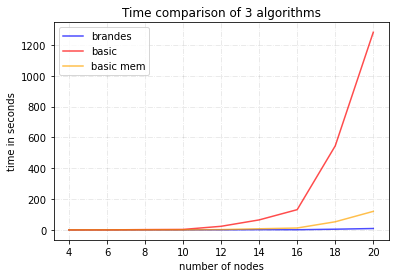

In [74]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.title('Time comparison of 3 algorithms')

xs = [x[0] for x in res_moi]
ys = [x[1] for x in res_moi]
line1 = plt.plot(xs,ys, color='blue', alpha=0.7, label="brandes")
xss = [x[0] for x in res_matthieu]
yss = [x[1] for x in res_matthieu]
line2 = plt.plot(xss,yss, color='red', alpha=0.7, label="basic")
xsss = [x[0] for x in res_matthieu_mem]
ysss = [x[1] for x in res_matthieu_mem]
line3 = plt.plot(xsss,ysss, color='orange', alpha=0.7, label = "basic mem")

plt.ylabel('time in seconds')
plt.xlabel('number of nodes')
plt.legend(loc='best')
plt.grid( color='black', alpha=0.1, linestyle='dashdot')
plt.savefig('time_comp_normal.png')
plt.show()


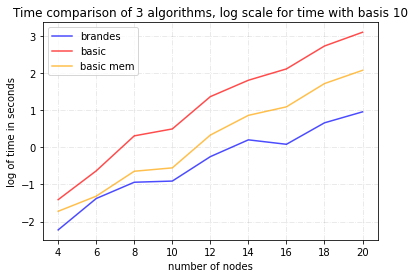

In [75]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.figure()
plt.title('Time comparison of 3 algorithms, log scale for time with basis 10')

xs = [x[0] for x in res_moi]
ys = [math.log(x[1],10) for x in res_moi]
line1 = plt.plot(xs,ys, color='blue', alpha=0.7, label="brandes")
xss = [x[0] for x in res_matthieu]
yss = [math.log(x[1],10) for x in res_matthieu]
line2 = plt.plot(xss,yss, color='red', alpha=0.7, label="basic")
xsss = [x[0] for x in res_matthieu_mem]
ysss = [math.log(x[1],10) for x in res_matthieu_mem]
line3 = plt.plot(xsss,ysss, color='orange', alpha=0.7, label = "basic mem")

plt.ylabel('log of time in seconds')
plt.xlabel('number of nodes')
plt.legend(loc='best')
plt.grid( color='black', alpha=0.1, linestyle='dashdot')
plt.savefig('time_comp_log.png')
plt.show()
